In [1]:
import pandas as pd

In [2]:
#!pip install openpyxl

**Deepdive into crop yield data for Barley**

In [3]:
crop_yield_barley=pd.read_excel('Crop_Yield/barleyTWP_Yield_2010_2018.xlsx')
print("Rows vs Columns",crop_yield_barley.shape)
crop_yield_barley.head()

Rows vs Columns (8784, 8)


,TWN_ID,PRNAME,CARUID,ECODISTRICT_ID,ECOREGION_ID,Year,Predicted_kghectare,Predicted_bushelacre
0,00101E1,Manitoba,4608,852,162,2010,4327.878515,77.224184
1,00101W1,Manitoba,4608,852,162,2010,2129.560180,37.998651
2,00102E1,Manitoba,4608,853,162,2010,1009.935871,18.020717
3,00102W1,Manitoba,4608,852,162,2010,3644.473822,65.029902
4,00103E1,Manitoba,4609,853,162,2010,NaN,NaN


In [4]:
print("Date range for yield dataset \n",min(crop_yield_barley['Year']),max(crop_yield_barley['Year']))

Date range for yield dataset 
 2010 2018


In [5]:
print(crop_yield_barley['PRNAME'].unique())
print(len(crop_yield_barley['TWN_ID'].unique()))

['Manitoba']
976


Data is at TWN_ID,Year level

In [6]:
976*9

8784

In [7]:
print(len(crop_yield_barley['ECOREGION_ID'].unique()))
print(len(crop_yield_barley['ECODISTRICT_ID'].unique()))

8
44


In [8]:
crop_yield_barley.describe()
crop_yield_barley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TWN_ID                8784 non-null   object 
 1   PRNAME                8784 non-null   object 
 2   CARUID                8784 non-null   int64  
 3   ECODISTRICT_ID        8784 non-null   int64  
 4   ECOREGION_ID          8784 non-null   int64  
 5   Year                  8784 non-null   int64  
 6   Predicted_kghectare   5585 non-null   float64
 7   Predicted_bushelacre  5585 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 549.1+ KB


Predicted_kghectare and Predicted_bushelacre have Null values

**CLIMATE DATA DEEPDIVE**

In [9]:
climate_data=pd.read_table('Climate1985_2020/3WeeksRunningAvg/SPRWHT_TWN_PRA_1985_2020_Climate_MovingAvg_week40.txt', delimiter = '\t')
print("Rows vs Columns",climate_data.shape)
climate_data.head()

Rows vs Columns (252864, 128)


,TWN_ID,Year,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,SumPcpn23_25,SumPcpn24_26,SumPcpn25_27,...,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40
0,00101E1,1985,32.0,34.5,29.5,35.5,43.7,24.7,80.7,74.5,...,0.124762,0.259048,0.507143,0.753810,0.860952,0.883333,0.849524,0.848095,0.853810,0.869048
1,00101E1,1986,30.2,19.6,5.4,26.9,40.7,73.2,51.9,50.3,...,0.437619,0.288095,0.177619,0.074286,0.037619,0.055714,0.090952,0.147143,0.198571,0.290476
2,00101E1,1987,14.4,37.9,59.9,61.2,40.7,50.7,51.6,54.6,...,0.483333,0.365714,0.310000,0.415238,0.534286,0.570476,0.547143,0.551429,0.580000,0.586667
3,00101E1,1988,34.9,22.9,19.0,0.0,14.3,16.7,16.7,27.7,...,0.004286,0.027619,0.109524,0.164286,0.179524,0.142381,0.166190,0.216190,0.251905,0.247619
4,00101E1,1989,27.4,37.5,40.5,51.1,52.0,67.4,84.4,67.0,...,0.110952,0.194286,0.318095,0.384762,0.439524,0.459048,0.489048,0.509048,0.518571,0.480000


In [10]:
print("Date range for yield dataset \n",min(climate_data['Year']),max(climate_data['Year']))

Date range for yield dataset 
 1985 2020


In [11]:
#SUBSETTING THE DATA FOR 2010-2018
climate_data_filtered=climate_data[(climate_data['Year']>=2010) & (climate_data['Year']<=2018)]
print("Rows vs Columns",climate_data_filtered.shape)
print("Date range for yield dataset \n",min(climate_data_filtered['Year']),max(climate_data_filtered['Year']))


Rows vs Columns (63216, 128)
Date range for yield dataset 
 2010 2018


In [12]:
print(len(climate_data_filtered['TWN_ID'].unique()))

7024


In [13]:
7024*9

63216

Data is at TWN_ID,Year level

In [14]:
crop_yield_climate_barley=pd.merge(crop_yield_barley, climate_data_filtered, on=['TWN_ID','Year'])
crop_yield_climate_barley.head()

,TWN_ID,PRNAME,CARUID,ECODISTRICT_ID,ECOREGION_ID,Year,Predicted_kghectare,Predicted_bushelacre,SumPcpn18_20,SumPcpn19_21,...,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40
0,00101E1,Manitoba,4608,852,162,2010,4327.878515,77.224184,53.6,111.1,...,0.182381,0.182857,0.184762,0.206667,0.361905,0.546667,0.767619,0.844762,0.873810,0.867143
1,00101W1,Manitoba,4608,852,162,2010,2129.560180,37.998651,57.2,114.7,...,0.458571,0.447619,0.441905,0.449048,0.528095,0.611429,0.710952,0.762381,0.815238,0.842381
2,00102E1,Manitoba,4608,853,162,2010,1009.935871,18.020717,37.5,158.2,...,0.290000,0.283810,0.233810,0.200476,0.260476,0.360952,0.498571,0.599524,0.698571,0.759524
3,00102W1,Manitoba,4608,852,162,2010,3644.473822,65.029902,57.2,114.7,...,0.458571,0.447619,0.441905,0.449048,0.528095,0.611429,0.710952,0.762381,0.815238,0.842381
4,00103E1,Manitoba,4609,853,162,2010,NaN,NaN,37.5,158.2,...,0.290000,0.283810,0.233810,0.200476,0.260476,0.360952,0.498571,0.599524,0.698571,0.759524


In [15]:
#(crop_yield_climate_barley.iloc[: , 100:134]).info()

In [16]:
ecv_smos_barley=pd.read_csv("ECV_SMOS2010-2020/DMET_output/TWN_Barley_ECV_SMOS_Weekly_20100101.20201231.csv")
print("Rows vs Columns",ecv_smos_barley.shape)
ecv_smos_barley.head()

Rows vs Columns (1684680, 10)


,TWP_ID,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK
0,00101E1,90,32.693829,32.693829,0.000000,32.693825,90,2011,129,19
1,00101W1,41,30.032328,32.693829,2.661501,31.200794,41,2011,129,19
2,00101W2,89,31.222174,31.222174,0.000000,31.222170,89,2011,129,19
3,00101W3,17,17.208323,17.208323,0.000000,17.208323,17,2011,129,19
4,00102E1,86,32.693829,39.018414,6.324585,35.488403,86,2011,129,19


In [17]:
print("Date range for yield dataset \n",min(ecv_smos_barley['YEAR']),max(ecv_smos_barley['YEAR']))

Date range for yield dataset 
 2010 2020


In [18]:
print(max(ecv_smos_barley['WEEK'].unique()))
print(min(ecv_smos_barley['WEEK'].unique()))
print(len(ecv_smos_barley['WEEK'].unique()))

40
15
26


In [19]:
print(len(ecv_smos_barley['TWP_ID'].unique()))

6060


In [20]:
crop_yield_climate_ecv_barley=pd.merge(crop_yield_climate_barley, ecv_smos_barley, left_on=['TWN_ID','Year'],right_on=['TWP_ID','YEAR'])
print("Rows vs Columns",crop_yield_climate_ecv_barley.shape)
crop_yield_climate_ecv_barley.head()

Rows vs Columns (163172, 144)


,TWN_ID,PRNAME,CARUID,ECODISTRICT_ID,ECOREGION_ID,Year,Predicted_kghectare,Predicted_bushelacre,SumPcpn18_20,SumPcpn19_21,...,TWP_ID,VALID_COUNT,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK
0,00101E1,Manitoba,4608,852,162,2010,4327.878515,77.224184,53.6,111.1,...,00101E1,90,14.743516,14.743516,0.0,14.743517,90,2010,228,33
1,00101E1,Manitoba,4608,852,162,2010,4327.878515,77.224184,53.6,111.1,...,00101E1,90,32.528141,32.528141,0.0,32.528137,90,2010,172,25
2,00101E1,Manitoba,4608,852,162,2010,4327.878515,77.224184,53.6,111.1,...,00101E1,90,30.997330,30.997330,0.0,30.997326,90,2010,270,39
3,00101E1,Manitoba,4608,852,162,2010,4327.878515,77.224184,53.6,111.1,...,00101E1,90,19.335115,19.335115,0.0,19.335114,90,2010,179,26
4,00101E1,Manitoba,4608,852,162,2010,4327.878515,77.224184,53.6,111.1,...,00101E1,90,11.992727,11.992727,0.0,11.992727,90,2010,186,27


In [21]:
ESI_barley=pd.read_csv("ESI_2001_2019/DMET_output/TownshipPrairieAGR_Barley_ESI_4WK_2001wk01.2019wk47.csv")
print("Rows vs Columns",ESI_barley.shape)
ESI_barley.head()

Rows vs Columns (4736641, 11)


,Unnamed: 0,REF_ID,TWP_ID,MIN,MAX,RANGE,MEAN,TOTAL_COUNT,YEAR,DOY,WEEK
0,1,1,00101E1,0.921964,1.509088,0.587124,1.145342,8,2014,232,34
1,2,1,00101E1,-0.701848,-0.332269,0.369579,-0.473712,8,2005,309,44
2,3,1,00101E1,1.059902,2.106585,1.046682,1.604351,8,2014,288,42
3,4,1,00101E1,1.144558,1.615135,0.470577,1.420570,8,2016,288,41
4,5,1,00101E1,1.041796,1.541152,0.499357,1.216821,8,2010,316,45


In [22]:
ndvi_barley=pd.read_csv("NDVI_MODIS/3weekMovingAvg/Barley_TWP_MovingAvg.csv")
print("Rows vs Columns",ndvi_barley.shape)
ndvi_barley.head()

Rows vs Columns (132237, 22)


,TWP_ID,YEAR,NDVI18_20,NDVI19_21,NDVI20_22,NDVI21_23,NDVI22_24,NDVI23_25,NDVI24_26,NDVI25_27,...,NDVI28_30,NDVI29_31,NDVI30_32,NDVI31_33,NDVI32_34,NDVI33_35,NDVI34_36,NDVI35_37,NDVI36_38,NDVI_MAX
0,00101E1,2000,0.258671,0.311579,0.401550,0.470994,0.556567,0.593407,0.658414,0.696670,...,0.759424,0.714424,0.665799,0.608039,0.550279,0.515272,0.493070,0.476909,0.434355,0.800800
1,00101E1,2001,0.271323,0.298909,0.328851,0.360393,0.411060,0.475864,0.554804,0.633744,...,0.769079,0.775396,0.738588,0.683314,0.625692,0.568179,0.506804,0.442296,0.377748,0.795458
2,00101E1,2002,0.226102,0.242320,0.254070,0.294499,0.324474,0.381381,0.437607,0.535328,...,0.731016,0.725369,0.698161,0.655758,0.615386,0.570171,0.539343,0.518289,0.477666,0.739755
3,00101E1,2003,0.244313,0.277861,0.319240,0.391883,0.473061,0.552198,0.615656,0.665832,...,0.747625,0.736296,0.702171,0.630465,0.528316,0.454826,0.425147,0.410482,0.384960,0.769387
4,00101E1,2004,0.235641,0.250514,0.258773,0.290772,0.342702,0.419829,0.489442,0.552601,...,0.643842,0.622118,0.667679,0.690839,0.708425,0.663650,0.624603,0.581999,0.546990,0.758927


CROP YIELD DATA IS AT A TOWNSHIPID YEAR LEVEL NOT WEEK
WHAT TO DO/>


In [23]:
ndvi_barley.head()

,TWP_ID,YEAR,NDVI18_20,NDVI19_21,NDVI20_22,NDVI21_23,NDVI22_24,NDVI23_25,NDVI24_26,NDVI25_27,...,NDVI28_30,NDVI29_31,NDVI30_32,NDVI31_33,NDVI32_34,NDVI33_35,NDVI34_36,NDVI35_37,NDVI36_38,NDVI_MAX
0,00101E1,2000,0.258671,0.311579,0.401550,0.470994,0.556567,0.593407,0.658414,0.696670,...,0.759424,0.714424,0.665799,0.608039,0.550279,0.515272,0.493070,0.476909,0.434355,0.800800
1,00101E1,2001,0.271323,0.298909,0.328851,0.360393,0.411060,0.475864,0.554804,0.633744,...,0.769079,0.775396,0.738588,0.683314,0.625692,0.568179,0.506804,0.442296,0.377748,0.795458
2,00101E1,2002,0.226102,0.242320,0.254070,0.294499,0.324474,0.381381,0.437607,0.535328,...,0.731016,0.725369,0.698161,0.655758,0.615386,0.570171,0.539343,0.518289,0.477666,0.739755
3,00101E1,2003,0.244313,0.277861,0.319240,0.391883,0.473061,0.552198,0.615656,0.665832,...,0.747625,0.736296,0.702171,0.630465,0.528316,0.454826,0.425147,0.410482,0.384960,0.769387
4,00101E1,2004,0.235641,0.250514,0.258773,0.290772,0.342702,0.419829,0.489442,0.552601,...,0.643842,0.622118,0.667679,0.690839,0.708425,0.663650,0.624603,0.581999,0.546990,0.758927


In [24]:
climate_data.head()

,TWN_ID,Year,SumPcpn18_20,SumPcpn19_21,SumPcpn20_22,SumPcpn21_23,SumPcpn22_24,SumPcpn23_25,SumPcpn24_26,SumPcpn25_27,...,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40
0,00101E1,1985,32.0,34.5,29.5,35.5,43.7,24.7,80.7,74.5,...,0.124762,0.259048,0.507143,0.753810,0.860952,0.883333,0.849524,0.848095,0.853810,0.869048
1,00101E1,1986,30.2,19.6,5.4,26.9,40.7,73.2,51.9,50.3,...,0.437619,0.288095,0.177619,0.074286,0.037619,0.055714,0.090952,0.147143,0.198571,0.290476
2,00101E1,1987,14.4,37.9,59.9,61.2,40.7,50.7,51.6,54.6,...,0.483333,0.365714,0.310000,0.415238,0.534286,0.570476,0.547143,0.551429,0.580000,0.586667
3,00101E1,1988,34.9,22.9,19.0,0.0,14.3,16.7,16.7,27.7,...,0.004286,0.027619,0.109524,0.164286,0.179524,0.142381,0.166190,0.216190,0.251905,0.247619
4,00101E1,1989,27.4,37.5,40.5,51.1,52.0,67.4,84.4,67.0,...,0.110952,0.194286,0.318095,0.384762,0.439524,0.459048,0.489048,0.509048,0.518571,0.480000


### VAL EDA (PCPN VS NDVI)

In [25]:
ndvi_climate=ndvi_barley.merge(climate_data,how="inner",left_on=["TWP_ID","YEAR"],right_on=["TWN_ID","Year"])
ndvi_climate.drop(columns=['TWN_ID','Year'],inplace=True)
ndvi_climate.head(5)

,TWP_ID,YEAR,NDVI18_20,NDVI19_21,NDVI20_22,NDVI21_23,NDVI22_24,NDVI23_25,NDVI24_26,NDVI25_27,...,AvgPrcnAWHC29_31,AvgPrcnAWHC30_32,AvgPrcnAWHC31_33,AvgPrcnAWHC32_34,AvgPrcnAWHC33_35,AvgPrcnAWHC34_36,AvgPrcnAWHC35_37,AvgPrcnAWHC36_38,AvgPrcnAWHC37_39,AvgPrcnAWHC38_40
0,00101E1,2000,0.258671,0.311579,0.401550,0.470994,0.556567,0.593407,0.658414,0.696670,...,0.112381,0.179524,0.347619,0.524286,0.703333,0.818571,0.890952,0.888095,0.886190,0.906190
1,00101E1,2001,0.271323,0.298909,0.328851,0.360393,0.411060,0.475864,0.554804,0.633744,...,0.493333,0.478095,0.456667,0.448571,0.475238,0.478571,0.429524,0.422381,0.490476,0.553333
2,00101E1,2002,0.226102,0.242320,0.254070,0.294499,0.324474,0.381381,0.437607,0.535328,...,0.140000,0.143810,0.216190,0.299524,0.425238,0.578571,0.704286,0.786667,0.821905,0.854286
3,00101E1,2003,0.244313,0.277861,0.319240,0.391883,0.473061,0.552198,0.615656,0.665832,...,0.222381,0.202381,0.221429,0.215238,0.208095,0.204286,0.194286,0.224762,0.286190,0.348095
4,00101E1,2004,0.235641,0.250514,0.258773,0.290772,0.342702,0.419829,0.489442,0.552601,...,0.331905,0.247619,0.288571,0.307143,0.407143,0.415238,0.445238,0.394762,0.420000,0.483333


In [26]:
ndvi_filter_col=["TWP_ID","YEAR"]+[col for col in ndvi_climate if col.startswith("NDVI")]
ndvi=ndvi_climate[ndvi_filter_col]
ndvi=ndvi.drop(columns=["NDVI_MAX"])
ndvi_melt=pd.melt(ndvi,id_vars=['TWP_ID','YEAR'],var_name='week',value_name='NDVI')
ndvi_melt["week"]=ndvi_melt["week"].str.slice(start=4)
ndvi_melt

,TWP_ID,YEAR,week,NDVI
0,00101E1,2000,18_20,0.258671
1,00101E1,2001,18_20,0.271323
2,00101E1,2002,18_20,0.226102
3,00101E1,2003,18_20,0.244313
4,00101E1,2004,18_20,0.235641
...,...,...,...,...
2512498,11018W5,2016,36_38,0.446768
2512499,11018W5,2017,36_38,0.435605
2512500,11018W5,2018,36_38,0.460300
2512501,11018W5,2019,36_38,0.492560


In [27]:
pcpn_filter_col=["TWP_ID","YEAR"]+[col for col in ndvi_climate if col.startswith("SumPcpn")]
pcpn=ndvi_climate[pcpn_filter_col]
pcpn_melt=pd.melt(pcpn,id_vars=['TWP_ID','YEAR'],var_name='week',value_name='PCPN')
pcpn_melt["week"]=pcpn_melt["week"].str.slice(start=7)
pcpn_melt

,TWP_ID,YEAR,week,PCPN
0,00101E1,2000,18_20,38.0
1,00101E1,2001,18_20,69.0
2,00101E1,2002,18_20,50.4
3,00101E1,2003,18_20,81.0
4,00101E1,2004,18_20,77.0
...,...,...,...,...
2776972,11018W5,2016,38_40,9.0
2776973,11018W5,2017,38_40,2.6
2776974,11018W5,2018,38_40,2.6
2776975,11018W5,2019,38_40,11.3


In [28]:
ndvi_pcpn_id_year_week=ndvi_melt.merge(pcpn_melt,how="inner",left_on=["TWP_ID","YEAR","week"],right_on=["TWP_ID","YEAR","week"])
ndvi_pcpn_id_year_week

,TWP_ID,YEAR,week,NDVI,PCPN
0,00101E1,2000,18_20,0.258671,38.0
1,00101E1,2001,18_20,0.271323,69.0
2,00101E1,2002,18_20,0.226102,50.4
3,00101E1,2003,18_20,0.244313,81.0
4,00101E1,2004,18_20,0.235641,77.0
...,...,...,...,...,...
2512498,11018W5,2016,36_38,0.446768,13.0
2512499,11018W5,2017,36_38,0.435605,7.3
2512500,11018W5,2018,36_38,0.460300,8.9
2512501,11018W5,2019,36_38,0.492560,43.1


In [29]:
#Average NDVI & PCPN for each year & week
ndvi_avg_year_week=ndvi_pcpn_id_year_week.groupby(["YEAR","week"])["NDVI"].mean().reset_index()
pcpn_avg_year_week=ndvi_pcpn_id_year_week.groupby(["YEAR","week"])["PCPN"].mean().reset_index()
ndvi_pcpn_avg_year_week=ndvi_avg_year_week.merge(pcpn_avg_year_week,how="inner",on=["YEAR","week"])

In [30]:
ndvi_pcpn_avg_year_week["Year_week"]=ndvi_pcpn_avg_year_week["YEAR"].astype(str)+"_"+ndvi_pcpn_avg_year_week["week"].astype(str)
ndvi_pcpn_avg_year_week

,YEAR,week,NDVI,PCPN,Year_week
0,2000,18_20,0.305946,26.953533,2000_18_20
1,2000,19_21,0.340280,32.153359,2000_19_21
2,2000,20_22,0.377669,25.008051,2000_20_22
3,2000,21_23,0.422016,52.702700,2000_21_23
4,2000,22_24,0.477669,55.188566,2000_22_24
...,...,...,...,...,...
394,2020,32_34,0.654489,29.827600,2020_32_34
395,2020,33_35,0.597336,23.627807,2020_33_35
396,2020,34_36,0.545229,22.447594,2020_34_36
397,2020,35_37,0.498104,16.591536,2020_35_37


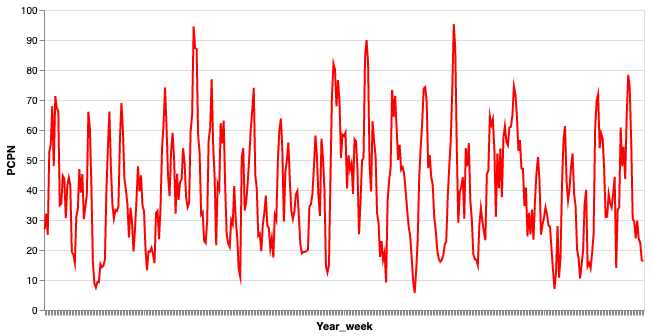

In [31]:
import altair as alt
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')
alt.Chart(ndvi_pcpn_avg_year_week).mark_line(color="red").encode(
    alt.X('Year_week',axis=alt.Axis(labels=False)),
    alt.Y('PCPN'),
).properties(width=600)

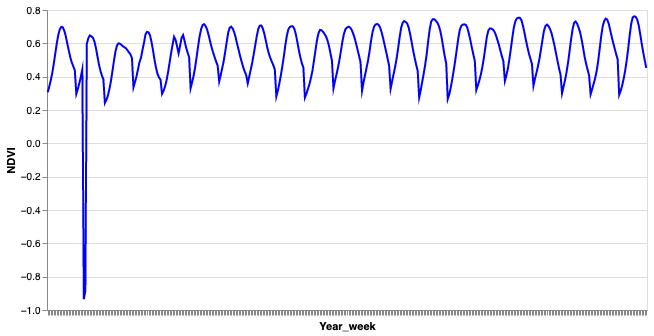

In [32]:
alt.Chart(ndvi_pcpn_avg_year_week).mark_line(color="blue").encode(
    alt.X('Year_week',axis=alt.Axis(labels=False)),
    alt.Y('NDVI'),
).properties(width=600)

In [64]:
#alt.Chart(ndvi_pcpn_avg_year_week).mark_line(color="red").encode(
#    alt.X('Year_week',axis=alt.Axis(labels=False)),
#    alt.Y('PCPN'),
#).properties(width=600)

In [65]:
#ndvi_pcpn_avg_year_week["NDVI"] = ndvi_pcpn_avg_year_week[ndvi_pcpn_avg_year_week["NDVI"]>0]["NDVI"]

In [66]:
#ndvi_pcpn_avg_year_week["NDVI"].hist()

In [67]:
#ndvi_pcpn_avg_year_week["PCPN"].hist()

In [96]:
ndvi_pcpn_id_year_week

,TWP_ID,YEAR,week,NDVI,PCPN
0,00101E1,2000,18_20,0.258671,38.0
1,00101E1,2001,18_20,0.271323,69.0
2,00101E1,2002,18_20,0.226102,50.4
3,00101E1,2003,18_20,0.244313,81.0
4,00101E1,2004,18_20,0.235641,77.0
...,...,...,...,...,...
2512498,11018W5,2016,36_38,0.446768,13.0
2512499,11018W5,2017,36_38,0.435605,7.3
2512500,11018W5,2018,36_38,0.460300,8.9
2512501,11018W5,2019,36_38,0.492560,43.1


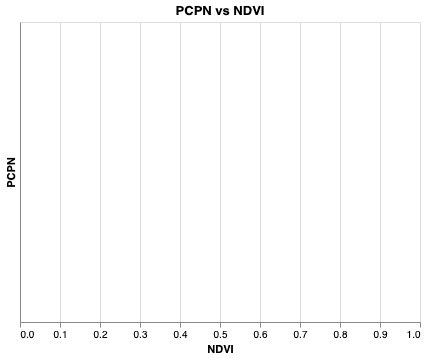

In [70]:
alt.Chart(ndvi_pcpn_id_year_week).mark_circle().encode(
    alt.X('NDVI',scale=alt.Scale(domain=(0,1))),
    alt.Y('PCPN')
).properties(title="PCPN vs NDVI")

In [46]:
ndvi_pcpn_id_year_week.columns

Index(['TWP_ID', 'YEAR', 'week', 'NDVI', 'PCPN'], dtype='object')

In [79]:
ndvi_pcpn_id_year_week_group = ndvi_pcpn_id_year_week.groupby(["YEAR","week"]).mean().reset_index()
ndvi_pcpn_id_year_week_group = ndvi_pcpn_id_year_week_group[ndvi_pcpn_id_year_week_group["NDVI"]>0]

In [55]:
ndvi_pcpn_id_year_week_group

,YEAR,week,NDVI,PCPN
0,2000,18_20,0.305946,26.953533
1,2000,19_21,0.340280,32.153359
2,2000,20_22,0.377669,25.008051
3,2000,21_23,0.422016,52.702700
4,2000,22_24,0.477669,55.188566
...,...,...,...,...
394,2020,32_34,0.654489,29.827600
395,2020,33_35,0.597336,23.627807
396,2020,34_36,0.545229,22.447594
397,2020,35_37,0.498104,16.591536


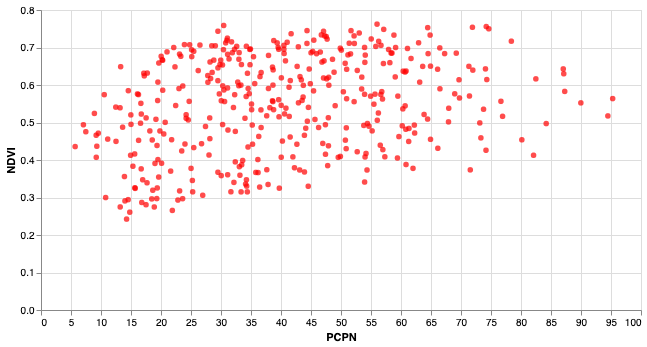

In [80]:
alt.Chart(ndvi_pcpn_id_year_week_group).mark_circle(color="red").encode(
    alt.X('PCPN'),
    alt.Y('NDVI'),
).properties(width=600)

In [83]:
ndvi_pcpn_id_year_week_group[["NDVI","PCPN"]].corr()

,NDVI,PCPN
NDVI,1.000000,0.279994
PCPN,0.279994,1.000000


In [86]:
import matplotlib.pyplot as plt

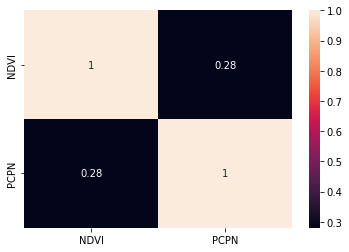

In [95]:
corrMatrix = ndvi_pcpn_id_year_week_group[["NDVI","PCPN"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()